# Notebook 6: Interpreting Coefficients

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import corr_utils as corr_utils
from src import ana_utils as ana_utils
from src import vis_utils
import collections
import scipy.stats


#np.set_printoptions(suppress=True)
from sklearn import linear_model

np.random.seed(7)

In [2]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

To find out how important an indicator is for predicting the ladder score, we had the following idea:
First, we run a regression (ridge regression on the full dataset, since it had the best performance).
Second, we remove the indicator corresponding to the largest coefficient from the dataset.
Third, we re-run the regression on the reduced dataset. If removing the coefficient in step two leads to a decrease in performance, then that coefficient might be causally linked to the ladder score.

#### Step 1: Ridge regression on full dataset

In [3]:
ridge = sklearn.linear_model.Ridge()

Mean loss (full set of indicators): 0.3677972992433995


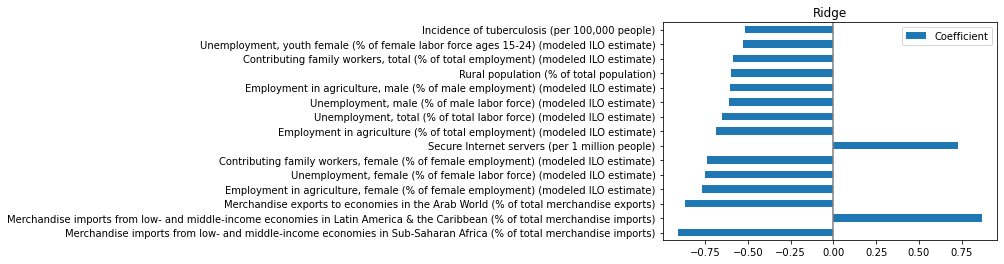

In [4]:
test_size = 30
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data.columns.values, n=15)

#### Step 2: Remove largest coefficient from dataset

In [5]:
largest_coef = ana_utils.get_largest_coefs(ridge, wb_data.columns.values, 1).index.values
print(largest_coef)
wb_data_red = wb_data.drop(largest_coef, axis=1)

['Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports)']


#### Step 3: Re-run regression

Mean loss (full set of indicators): 0.3801416159329939


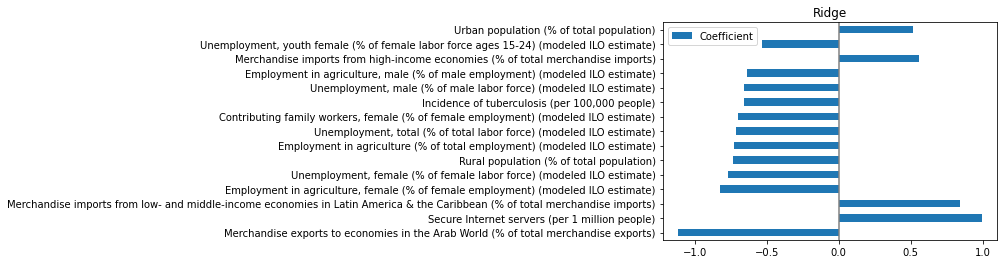

In [7]:
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_red, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data_red.columns.values, n=15)

#### Step 4: Rinse and repeat

In [8]:
wb_data_red = wb_data.copy(deep=True)

for i in range(0, 10):
    loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_red, gt=whr_data, test_size=test_size, scaling="normalize")
    largest_coef = ana_utils.get_largest_coefs(ridge, wb_data_red.columns.values, 1).index.values
    print("Mean loss: ", mean_loss)
    print("Removing coefficient ", largest_coef, "\n")
    wb_data_red = wb_data_red.drop(largest_coef, axis=1)

Mean loss:  0.3628117835866174
Removing coefficient  ['Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports)'] 

Mean loss:  0.3850455620465448
Removing coefficient  ['Merchandise exports to economies in the Arab World (% of total merchandise exports)'] 

Mean loss:  0.4001954296699724
Removing coefficient  ['Secure Internet servers (per 1 million people)'] 

Mean loss:  0.4045939774324908
Removing coefficient  ['Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports)'] 

Mean loss:  0.415202304135342
Removing coefficient  ['Unemployment, female (% of female labor force) (modeled ILO estimate)'] 

Mean loss:  0.42430387699762523
Removing coefficient  ['Employment in agriculture, female (% of female employment) (modeled ILO estimate)'] 

Mean loss:  0.4326294719116696
Removing coefficient  ['Incidence of tuberculosis (per 100,000 people)'] 

Mean loss:  0.437632